# Expected Versus Actual Water Isotope Abundance
  
### Abstract
  
This notebook explores the distributional difference between expected and actual H2O molecules found in the universe through spectroscopy, using data from the splatalogue database. The proportions of heavy water (deuterium-oxygen-deuterium) and semi-heavy water (deuterium-oxygen-protium) when compared to light water (protium-oxygen-protium) observed through spectroscopy are far greater than the expected distributions of said molecules.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"../input/water-astrochemistry/splatalogue_water.tsv", sep="\t")

In [3]:
df = df[~(df.Species == "H218Ov=0")]

In [4]:
df.Species.value_counts()

H2Ov2,2v2,v1,v3    8608
D2O                6576
HDO                1401
H2Ov=0             1376
Name: Species, dtype: int64

In [5]:
df.Species.loc[(df.Species == "H2Ov2,2v2,v1,v3") | (df.Species == "H2Ov=0")] = "H2O"

In [6]:
df

,Species,Chemical Name,"Ordered Freq (GHz) (rest frame, redshifted)",Resolved QNs,CDMS/JPL Intensity,Lovas/AST Intensity,E_L (cm^-1),E_L (K),Linelist
0,HDO,Water,"0.01616500, 0.01616500","8(6,2)-8(6,3)",-12.6634,NaN,1105.0032,1589.8440,JPL
1,HDO,Water,"0.03548910, 0.03548910","6(5,1)-6(5,2)",-11.1958,NaN,709.1664,1020.3264,JPL
2,HDO,Water,"0.05461830, 0.05461830","4(4,0)-4(4,1)",-10.2126,NaN,402.3290,578.8584,JPL
3,HDO,Water,"0.07937580, 0.07937580","9(6,3)-9(6,4)",-11.6221,NaN,1244.4371,1790.4571,JPL
4,HDO,Water,"0.10315050, 0.10315050","12(7,5)-12(7,6)",-12.8370,NaN,1942.3733,2794.6258,JPL
...,...,...,...,...,...,...,...,...,...
18460,D2O,Water,"28432.01844070, 28432.01844070","18(8,11)-17(1,16)",-7.8964,NaN,1721.9880,2477.5424,CDMS
18461,D2O,Water,"28479.43346270, 28479.43346270","17(10,8)-16(3,13)",-7.9053,NaN,1794.5774,2581.9817,CDMS
18462,D2O,Water,"28479.43396440, 28479.43396440","17(10,8)-16(3,13)",-7.9038,NaN,1794.5774,2581.9817,CDMS
18463,D2O,Water,"29343.95446990, 29343.95446990","19(9,11)-18(2,16)",-7.9847,NaN,2063.5425,2968.9603,CDMS


In [7]:
df.Species.value_counts()

H2O    9984
D2O    6576
HDO    1401
Name: Species, dtype: int64

Calculating the abundances using the CRC Handbook of Chemistry and Physics.

In [8]:
protium_abundance =   0.99985
deuterium_abundance = 0.000115

expected_h2o = protium_abundance ** 2
expected_hdo = deuterium_abundance * protium_abundance
expected_d2o = deuterium_abundance ** 2

# Natural abundances of the isotopes from the
# CRC Handbook of Chemistry and Physics.

expected = pd.DataFrame([["H2O", expected_h2o],["HDO", expected_hdo], ["D2O", expected_d2o]], columns=["Molecule", "Abundance"])

In [9]:
expected.set_index("Molecule")

,Abundance
Molecule,
H2O,9.997000e-01
HDO,1.149828e-04
D2O,1.322500e-08


In [10]:
actual = pd.DataFrame(df.Species.value_counts())
actual.columns = ["Observations"]
actual["Abundance"] = actual.Observations / actual.Observations.sum()
actual["Molecule"] = actual.index

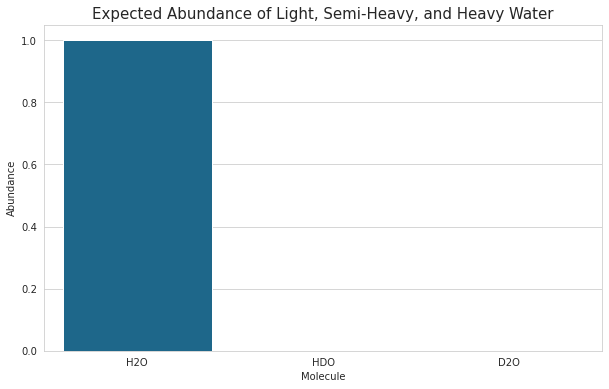

In [11]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=expected.Molecule, y='Abundance', data=expected, ci=None, color="#0c6e9c",orient='v', )
ax.set_title("Expected Abundance of Light, Semi-Heavy, and Heavy Water", fontsize=15)
ax.set_ylabel("Abundance")
plt.show()

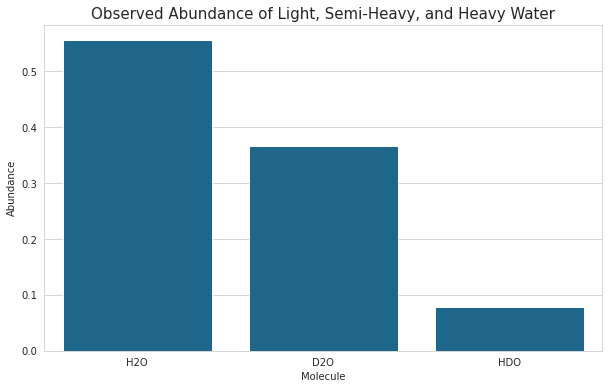

In [12]:
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=actual.Molecule, y='Abundance', data=actual, ci=None, color="#0c6e9c",orient='v')
ax.set_title("Observed Abundance of Light, Semi-Heavy, and Heavy Water", fontsize=15)
ax.set_ylabel("Abundance")
plt.show()